The dataset is comprised of records from 768 different people
to determine whether a given patient shows sign of diabetes. The dataset consists of information of eight
attributes and a label to indiate a patient or a healthy individual:
1. pgt: Number of times pregnant
2. Gls: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. bp: Diastolic blood pressure (mm Hg)
4. skt Triceps skin fold thickness (mm)
5. si: 2-Hour serum insulin (mu U/ml)
6. bmi: Body mass index (weight in kg/(height in m)^2)
7. dpf: Diabetes pedigree function
8. age: Age (years)
9. y: Class variable (0 or 1)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats

import phik

In [69]:
df4=pd.read_csv("dataset4.csv")

#### Exploring

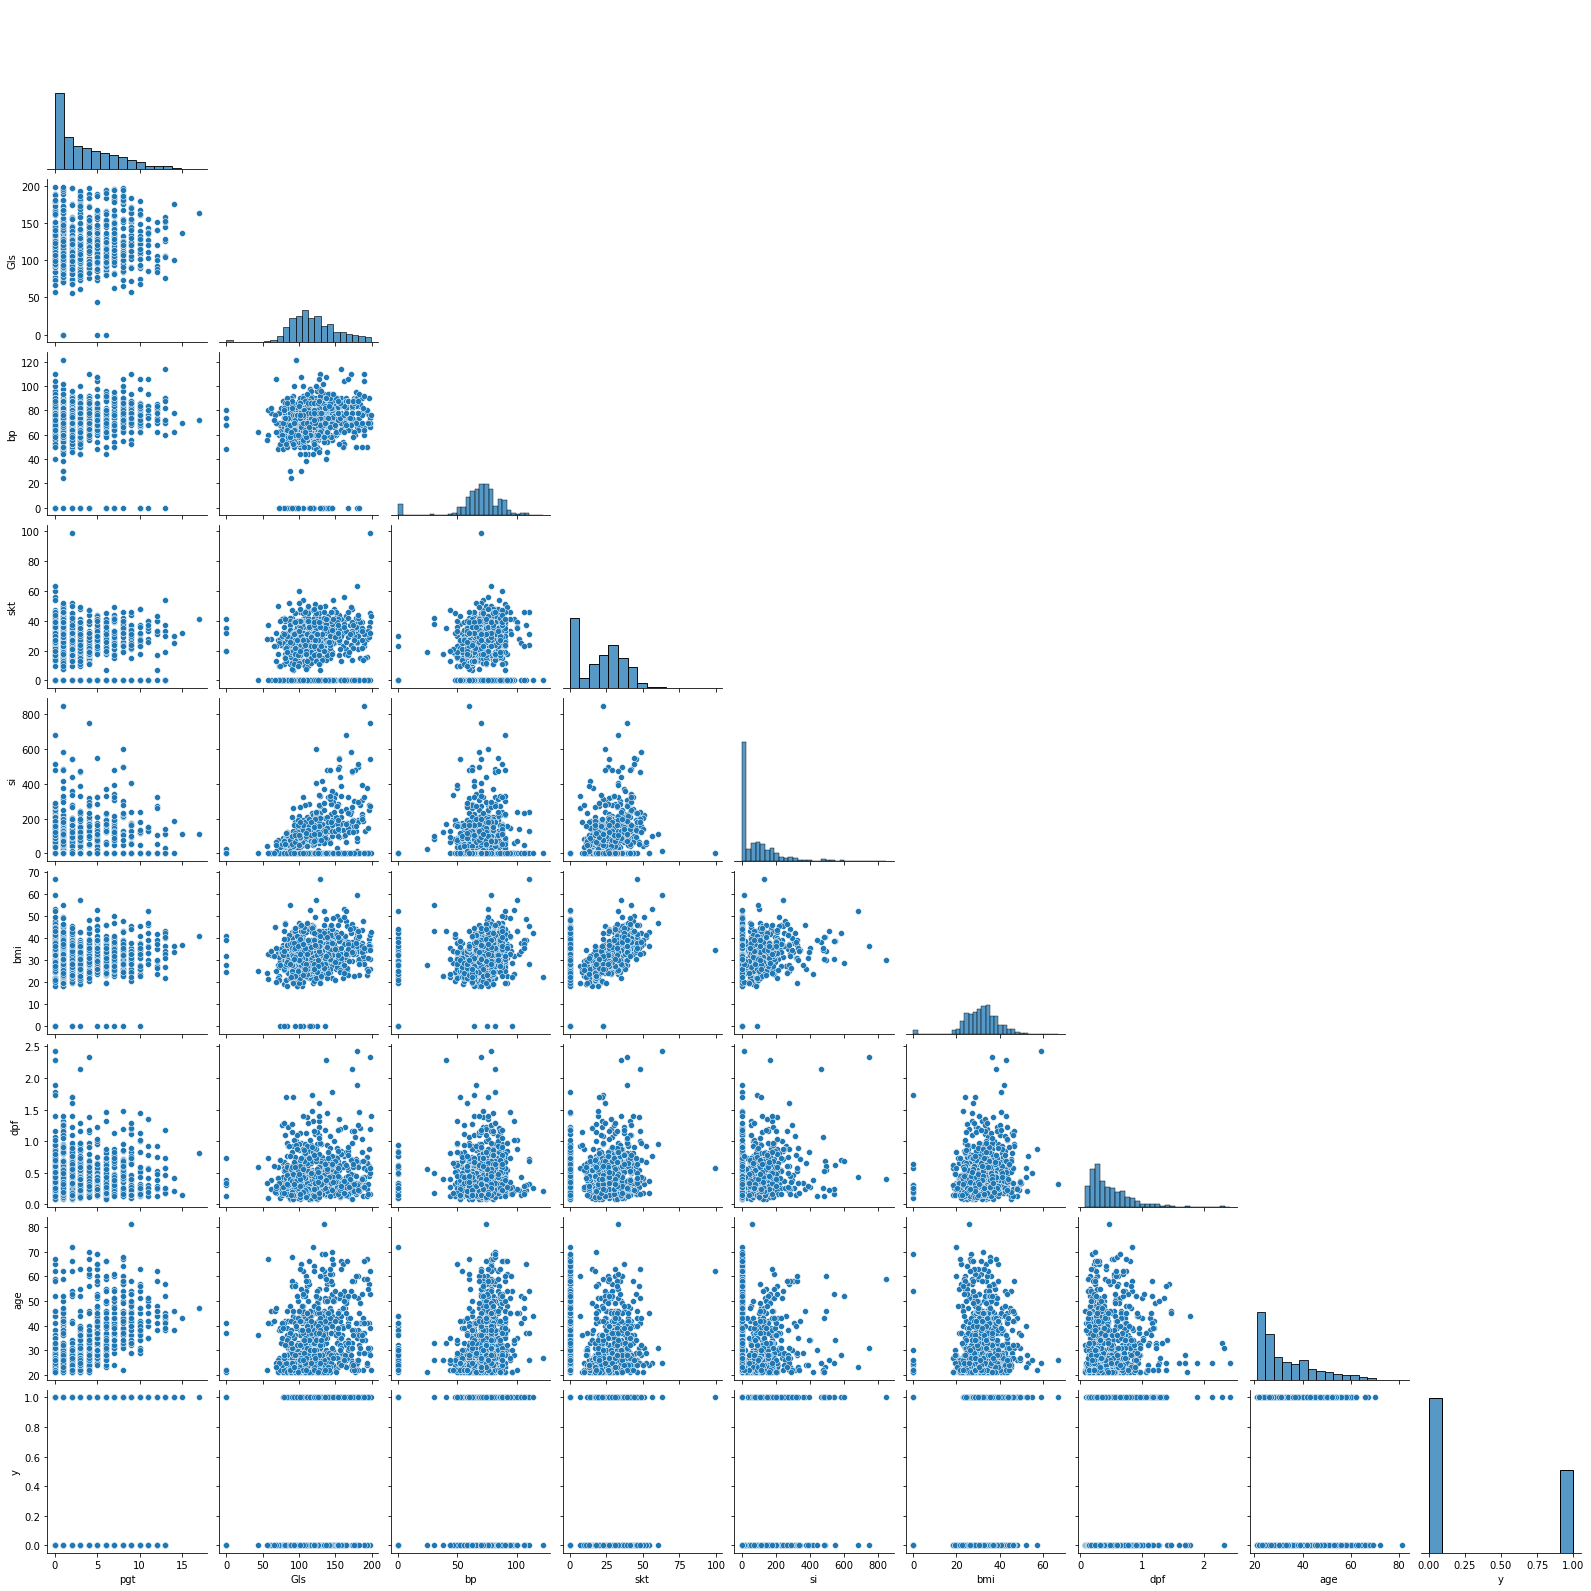

In [70]:
sns.pairplot(df4, corner=True)

In [71]:
X=df4.drop('y',axis=1)
y=df4['y']
dic={"Variable":list(X.columns),
    "Pearson":list(X.corrwith(y,method='pearson')),
    'spearman':list(X.corrwith(y,method='spearman')),
    "kendall":list(X.corrwith(y,method='kendall')),
    "Phik":pd.DataFrame(df4.phik_matrix()).iloc[0,1:]
}
pd.DataFrame(dic)

interval columns not set, guessing: ['pgt', 'Gls', 'bp', 'skt', 'si', 'bmi', 'dpf', 'age', 'y']


,Variable,Pearson,spearman,kendall,Phik
Gls,pgt,0.221898,0.198689,0.170370,0.147507
bp,Gls,0.466581,0.475776,0.390565,0.100296
skt,bp,0.065068,0.142921,0.119206,0.183777
si,skt,0.074752,0.089728,0.076297,0.000000
bmi,si,0.130548,0.066472,0.058531,0.138248
dpf,bmi,0.292695,0.309707,0.253676,0.000000
age,dpf,0.173844,0.175353,0.143359,0.634490
y,age,0.238356,0.309040,0.257363,0.307429


interval columns not set, guessing: ['pgt', 'Gls', 'bp', 'skt', 'si', 'bmi', 'dpf', 'age', 'y']


[Text(0.5, 1.0, 'PhiK')]

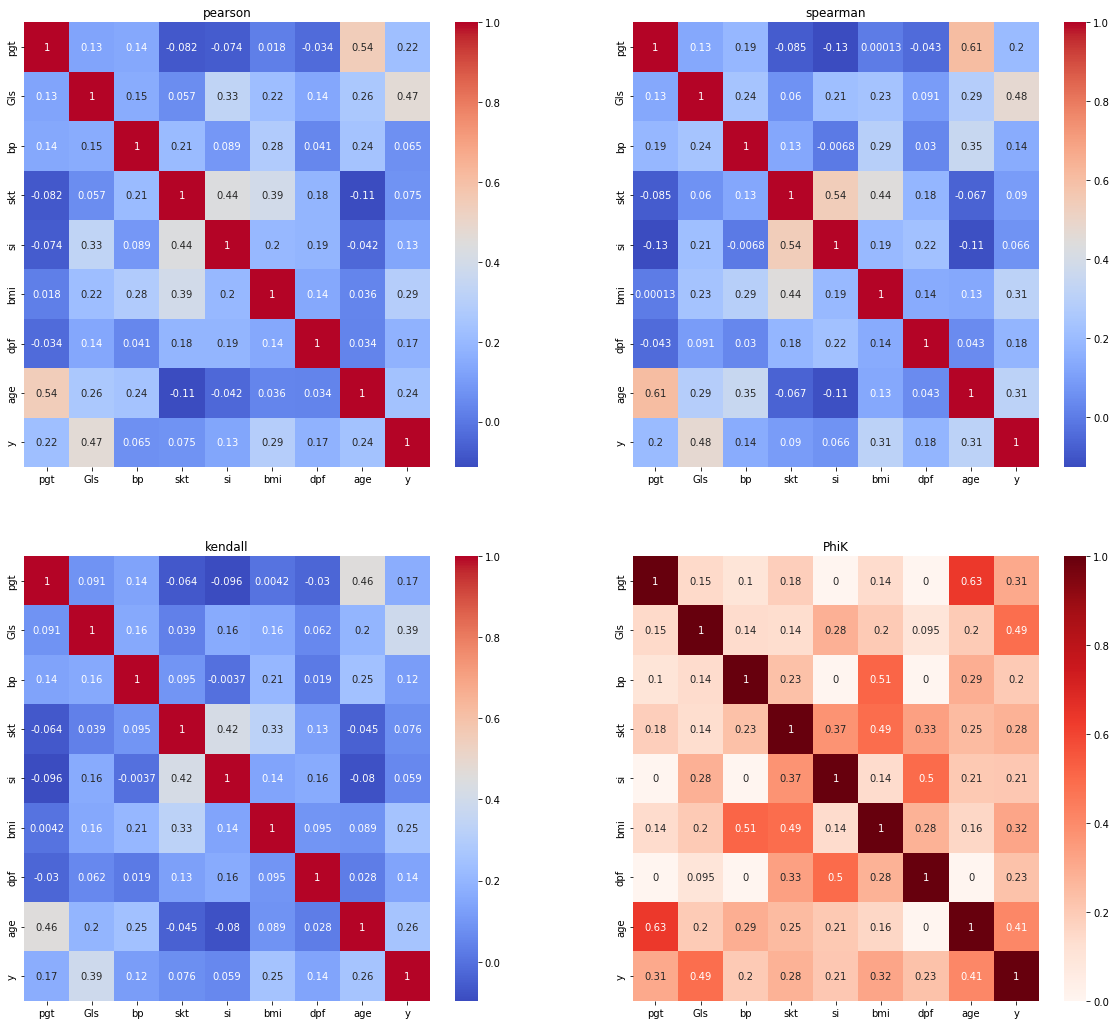

In [72]:
fig, ax=plt.subplots(2,2,figsize=(20,18))
sns.heatmap(df4.corr(method='pearson'),cmap='coolwarm',ax=ax[0,0],annot=True).set(title="pearson")
sns.heatmap(df4.corr(method='spearman'),cmap='coolwarm',ax=ax[0,1],annot=True).set(title="spearman")
sns.heatmap(df4.corr(method='kendall'),cmap='coolwarm',ax=ax[1,0],annot=True).set(title="kendall")
sns.heatmap(df4.phik_matrix(),cmap='Reds',ax=ax[1,1],annot=True).set(title="PhiK")

We can see target variable has high correlation coefficient (Phi_K) with GLs, age and bmi in decending order respectively. <br>
Similarly, pearson correlation coefficient indicates GLs, bml, pgt and age are highly correlated in decending order respectively.

#### Training logit model

In [73]:
X=df4.drop(['y'],axis=1)
y=df4[['y']]

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=999)

In [76]:
log_reg = sm.Logit(y_train, X_train, iterations=1000).fit()

# printing the summary table
print(log_reg.summary())

d:\#Jupyter\env\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['iterations']
  warnings.warn(msg, ValueWarning)
d:\#Jupyter\env\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['iterations']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully.
         Current function value: 0.625378
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  460
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            7
Date:                Thu, 10 Nov 2022   Pseudo R-squ.:                 0.04364
Time:                        17:24:50   Log-Likelihood:                -287.67
converged:                       True   LL-Null:                       -300.80
Covariance Type:            nonrobust   LLR p-value:                 0.0004534
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pgt            0.0966      0.036      2.721      0.007       0.027       0.166
Gls            0.0088      0.

In [77]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
#Predicting
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))
#Scores
cm = confusion_matrix(y_test, prediction) 
print('Accuracy Score: ', accuracy_score(y_test,prediction))
print(cm)

Accuracy Score:  0.7175324675324676
[[183  23]
 [ 64  38]]


#### Normalizing using Minmaxscaler ang traiing model

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=999)
log_reg = sm.Logit(y_train, X_train, max_iter=1000).fit()

# printing the summary table
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.602786
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  614
Model:                          Logit   Df Residuals:                      606
Method:                           MLE   Df Model:                            7
Date:                Thu, 10 Nov 2022   Pseudo R-squ.:                 0.06912
Time:                        17:24:50   Log-Likelihood:                -370.11
converged:                       True   LL-Null:                       -397.59
Covariance Type:            nonrobust   LLR p-value:                 1.513e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6335      0.525      1.207      0.228      -0.396       1.662
x2             1.7031      0.

d:\#Jupyter\env\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
d:\#Jupyter\env\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


In [80]:
#Predicting
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))
#Scores
cm = confusion_matrix(y_test, prediction) 
print('Accuracy Score: ', accuracy_score(y_test,prediction))
print(cm)

Accuracy Score:  0.6623376623376623
[[87 14]
 [38 15]]


Data scaling and increasing the training dataset did not increase the accuracy score as the new score is 0.66 whereas the previous score was 0.71

#### Cross validation

In [81]:
from sklearn.linear_model import LogisticRegressionCV

In [82]:
clf = LogisticRegressionCV(cv=10, max_iter=1000,random_state=0).fit(X_train, y_train)


In [83]:
#predict
yhat=clf.predict(X_test)
prediction = list(map(round, yhat))
#score
cm = confusion_matrix(y_test, prediction) 
print('Accuracy Score: ', accuracy_score(y_test,prediction))
print(cm)

Accuracy Score:  0.8051948051948052
[[92  9]
 [21 32]]


In [84]:
cm

array([[92,  9],
       [21, 32]], dtype=int64)

The accuracy increased while using cross-validated logistic regression.

#### Calculating ROC

In [93]:
threshold=np.linspace(0,1,20)
t=[]
for i in threshold:
    y_pred_prob=clf.predict_proba(X_test)[:,1]
    y_pred=[1 if y>=i else 0 for y in y_pred_prob]
    cm1 = confusion_matrix(y_test, y_pred)
    total1=sum(sum(cm1)) 
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    dic={"Threshold":i,
    'Accuracy':accuracy,
    'sensitivity':sensitivity,
    'specificity':specificity
    }
    t.append(dic)
T=pd.DataFrame(t)

In [94]:
T.head(2)

,Threshold,Accuracy,sensitivity,specificity
0,0.000000,0.344156,0.000000,1.0
1,0.052632,0.435065,0.138614,1.0


Text(0, 0.5, '1 - specificity')

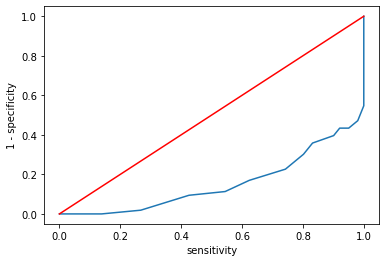

In [95]:
plt.plot(T.sensitivity,(1-T.specificity))
plt.plot((0,1),(0,1), color='r')
plt.xlabel('sensitivity')
plt.ylabel('1 - specificity')